# Importing Library

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [18]:
pd.set_option('display.max_columns', None)

In [19]:
#Load dataset
df = pd.read_csv("train.csv")

#Convert kolom yang berupa tanggal
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

#Remove duplicates
df = df.drop_duplicates()

#Mengubah atribut Postal Code menjadi sebuah string
df['Postal Code'] = df['Postal Code'].astype('Int64').astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   object        
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

# Data Understanding

A. Dataset Structure

In [8]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   object        
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

B. Preview Data

In [9]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


C. Time Coverage

In [10]:
df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2015-01-03 00:00:00'), Timestamp('2018-12-30 00:00:00'))

The dataset covers sales transaction from 2014 to 2018, which provides a sufficient time range for trend analysis.

D. Category Distribution

In [11]:
df['Category'].value_counts()
df['Region'].value_counts()
df['Segment'].value_counts()

,count
Segment,
Consumer,5101
Corporate,2953
Home Office,1746


# KPI Definition

Selected KPI
1.   Total Sales (Overall Revenue)
1.   Monthly Sales Trend (Growth and Seasonality)
2.   Sales by Category (Product Performance)
2.   Sales by Region (Geographic Performance)
1.   Sales by Segment (Customer Groups)




---

The analysis focuses on key business KPIs including total sales, monthly sales trends, and sales contribution by product category, region, and customer segment.




# Exploratory Data *Analysis*

##A. Monthly Sales Trend

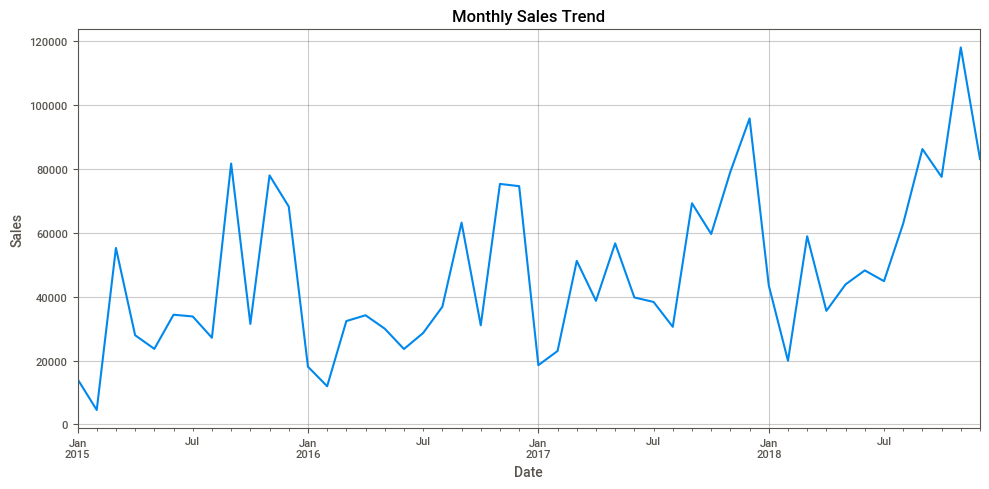

In [25]:
monthly_sales = (
    df
    .set_index('Order Date')
    .resample('ME')['Sales']
    .sum()
)
plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

###Insight

Sales exhibit a clear upward trend over time, with recurring peaks toward
the end of each year. This pattern suggests seasonality, likely driven by
year-end demand. Despite short-term fluctuations, the overall trajectory
indicates sustained sales growth across the observed period.


##B. Sales by Category

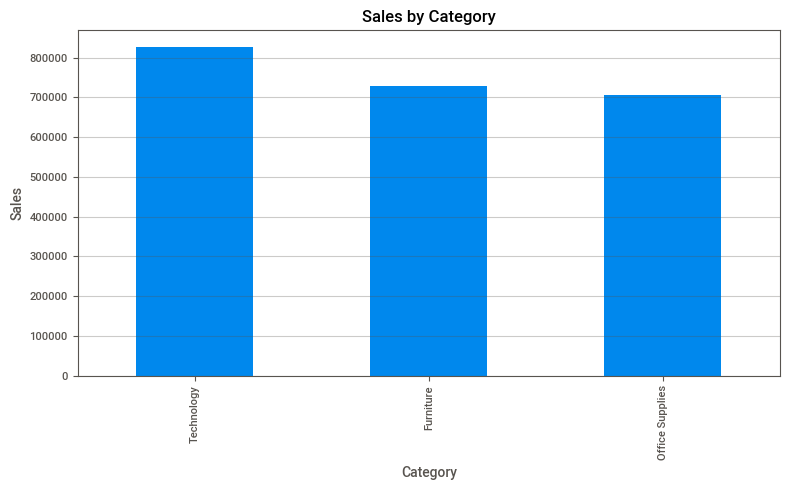

In [26]:
category_sales = (
    df
    .groupby('Category')['Sales']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
category_sales.plot(kind='bar')
plt.title("Sales by Category")
plt.ylabel("Sales")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

###Insight

Technology is the top performing category in terms of total sales, showing a significant lead over Furniture and Office Supplies.

This Suggest that high-value technology products are the primary contributors to overall revenue and should be strategic focus.

##C. Sales by Region

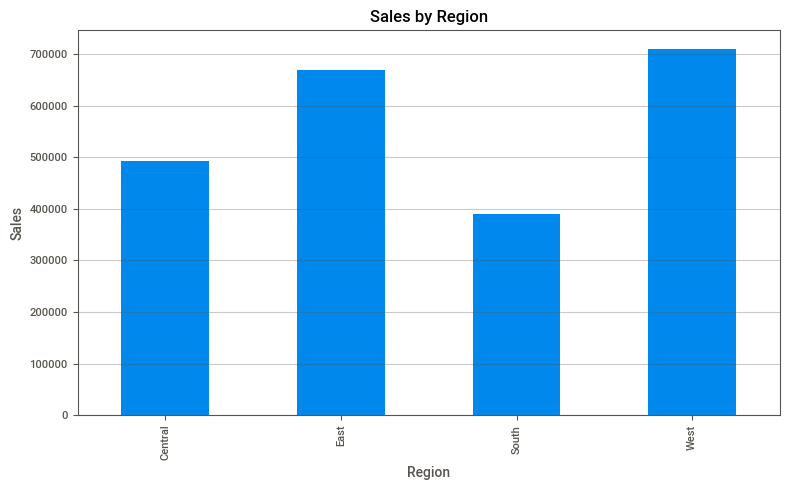

In [27]:
region_sales = df.groupby('Region')['Sales'].sum()

plt.figure(figsize=(8,5))
region_sales.plot(kind='bar')
plt.title("Sales by Region")
plt.ylabel("Sales")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

###Insight

West region is the most top performing region in terms of total sales, showing a slight lead over the East region and significant lead over South and Central region. This indicates that revenue is primarily driven by the West and East regions. In contrast, the South region underperforms and may require targeted strategic initiatives to improve sales performance

##D. Sales by Customer Segment

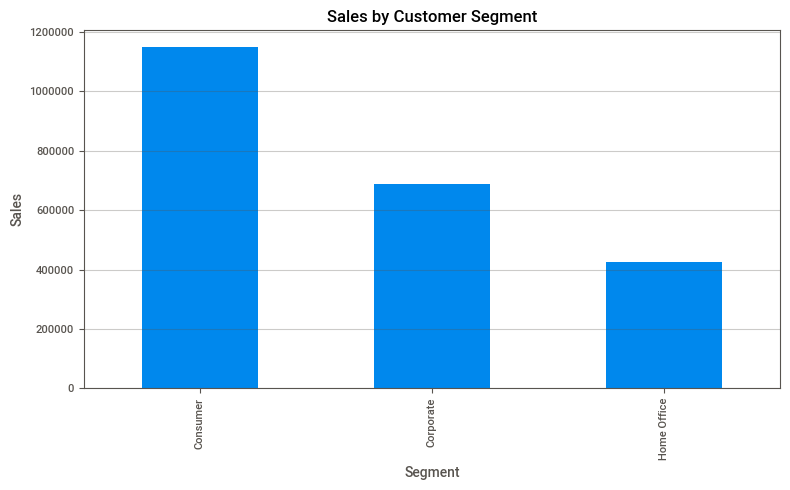

In [28]:
Customer_Segment_sales = df.groupby('Segment')['Sales'].sum()

plt.figure(figsize=(8,5))
Customer_Segment_sales.plot(kind='bar')
plt.title("Sales by Customer Segment")
plt.ylabel("Sales")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

###Insight

The customer segment is the top performing customer segment in terms of total sales, showing a significant lead over corporate and home office segment, this indicates that overall revenue is primarily driven by consumer customers, suggesting that sales and marketing strategies should continue to prioritize this segment.

# Key Insights

*   Sales exhibit a clear upward trend over time with recurring peaks toward the end of each year, indicating strong seasonality driven by year-end demand.
*   The Technology category is the top contributor to total sales, significantly outperforming Furniture and Office Supplies, making it the primary revenue driver.
*   The West region generates the highest total sales, followed closely by the East, while the South region consistently underperforms compared to other regions.
*   The Consumer segment accounts for the majority of total sales, showing a substantial lead over Corporate and Home Office segments.

# Business Recomendations

*   Prioritize inventory planning and marketing efforst ahead of year-end periods to capitalize on reccuring seasonal demand.
*   Allocate more resources toward high-performing Technology products, as they represent the primary driver of overall revenue.
*   Focus regional strategies on strengthening performance in the South region through targeted promotions or localized campaigns.
*   Continue prioritizing the Consumer segment while exploring growth opportunities in Corporate and Home Office segments to diversify revenue.



